# Ejemplo de generación de mapa de difracción

Este ejemplo muestra la capacidad de **Nookiin** para generar mapas de difracción para sistemas multicapa. A diferencia de los patrones de difracción tradicionales que solo marcan la posición de los picos de Bragg, los mapas de difracción representan la distribución continua de intensidad en el espacio recíproco. Estos se construyen sumando contribuciones lorentzianas centradas en cada punto de la red recíproca, generando una imagen suave donde las regiones de alta intensidad corresponden a interferencia constructiva.

El ejemplo muestra cómo calcular, visualizar y exportar dichos mapas, comparando entre distintos sistemas para evidenciar la influencia del apilamiento, los ángulos de rotación y la complejidad de las capas.

### Carga de System

La carga de las funciones requeridas se efectúa al importar nookiin y de este todas las funciones de nookiin.system, para esto es necesario ya haber instalado nookiin mediante el comando `pip install .` desde consola.

In [1]:
import sys
import os

import nookiin
from nookiin.system import *

VASP_Files = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'VASP_Files'))

Load System
Nookiin Ready-to-work


## Bicapa de grafeno rotada 2.65°

In [2]:
g1 = graphene()
g2 = graphene().mRot(2.65)
S1 = System([g1,g2])

Cálculo de Supercelda para el sistema.

Size of the primitive vectors: |a|=48.61666Å, |b|=48.61666Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |  11   12|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  794   |
|        Graphene         |  | -12   23|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |  10   13|  |  | 0.99979 -0.00230|  |   -0.136% // +0.11°   |  798   |
|    Graphene(2.65°)'     |  | -13   23|  |  | 0.00230  0.99749|  |   -0.136% // +0.11°   |        |
|                         |               |                       |                       |        |

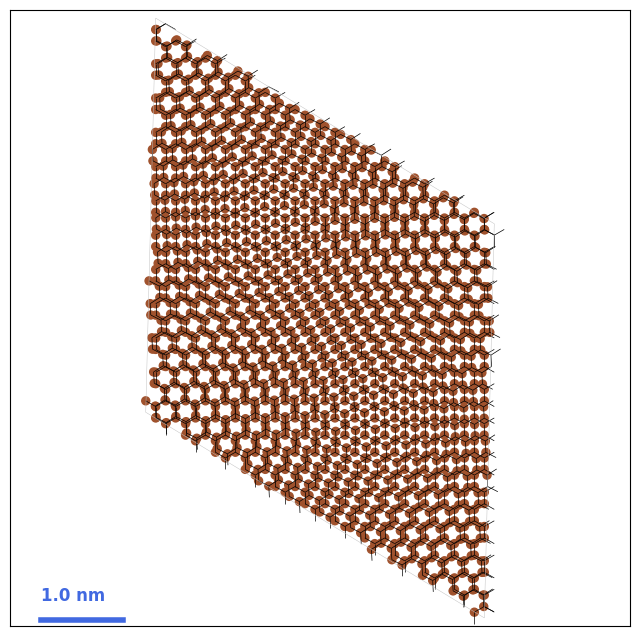

Reciprocal Space:


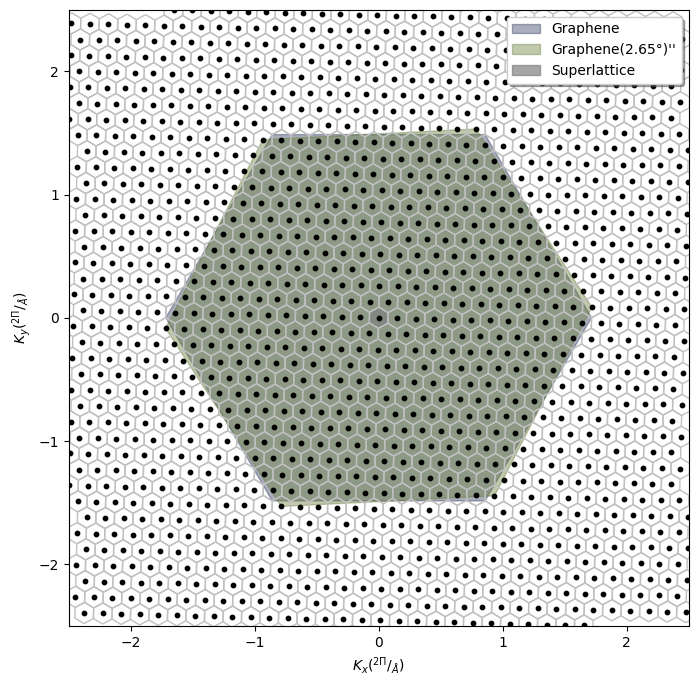

***The calculated supercell is optimized. At least one of the system layers was deformed to do so.


In [12]:
S1 = S1.generateSuperCell(RoS=15, eps=0.01, prntRes=True,showTable=True)

Patón de Difracción

Calculating diffraction pattern...


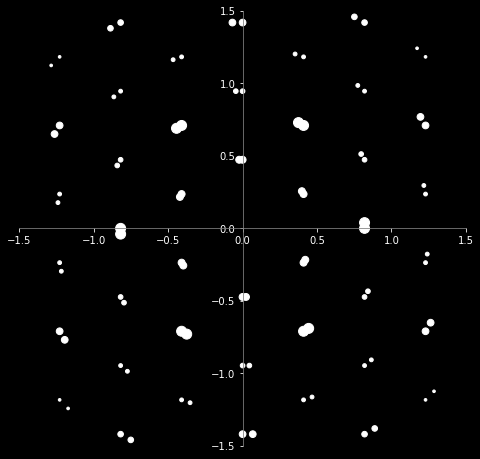

Diffraction pattern complete.


In [4]:
S1.diffractionPattern()

Se calcula el Mapa de difracción con una distribución del tipo Lorentziano, valor de width=0.005, una resolución de 300pts y guardando el resultado en una imagen.

Image address: 'C:\SS\Nook’iin\Nook-iin\Examples\Español\Images/Difraction-Map_S1(Lorentzian).png'


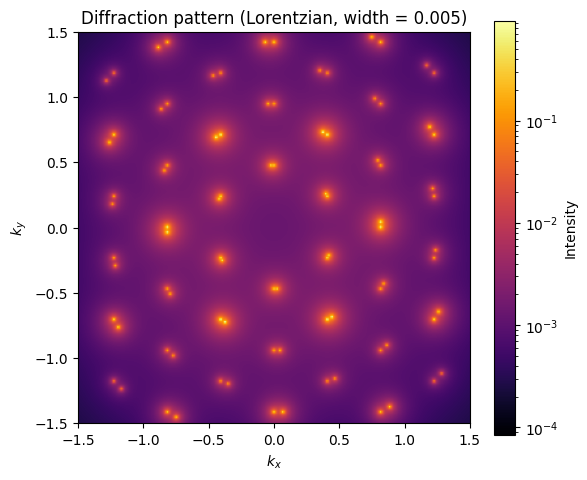

In [5]:
_=S1.plot_diffraction_map(width=0.005, typ="Lorentzian", resolution=300, prnt='Difraction-Map_S1')

## Heteroestructura Grafeno, hBN 7.15°

In [6]:
g = importLattice(VASP_Files+"/graphene")
g.name = "Graphene"
hBN = importLattice(VASP_Files+"/hBN")
hBN.name = "h_BN"
S2 = System([g,hBN.mRot(7.15)])

File 'C:\SS\Nook’iin\Nook-iin\VASP_Files/graphene.vasp' will be read
--Lattice created successfully
File 'C:\SS\Nook’iin\Nook-iin\VASP_Files/hBN.vasp' will be read
--Lattice created successfully


Size of the primitive vectors: |a|=19.58279Å, |b|=19.58279Å
Angle between vectors: 60.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   6    9|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  126   |
|        Graphene         |  |  -3    6|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |   9    4|  |  | 1.00139 -0.00147|  |   +0.212% // +0.07°   |  122   |
|       h_BN(7.15°)       |  |  -4    5|  |  | 0.00147  1.00286|  |   +0.212% // +0.07°   |        |
|                         |               |                       |                       |        |


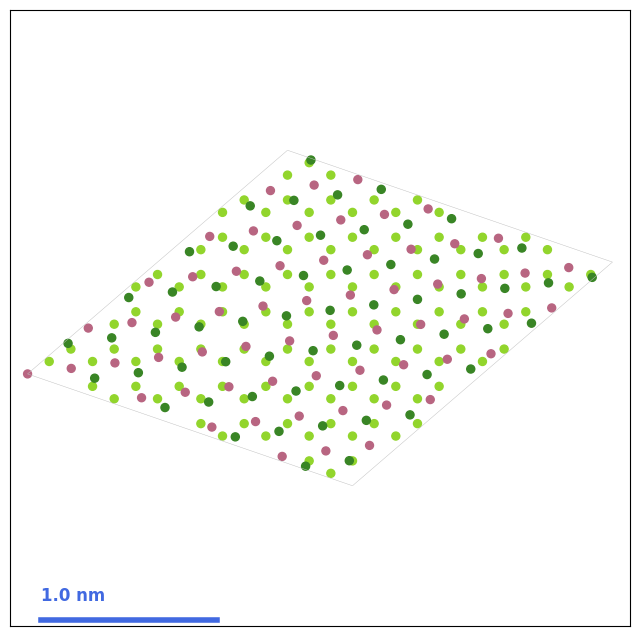

Reciprocal Space:


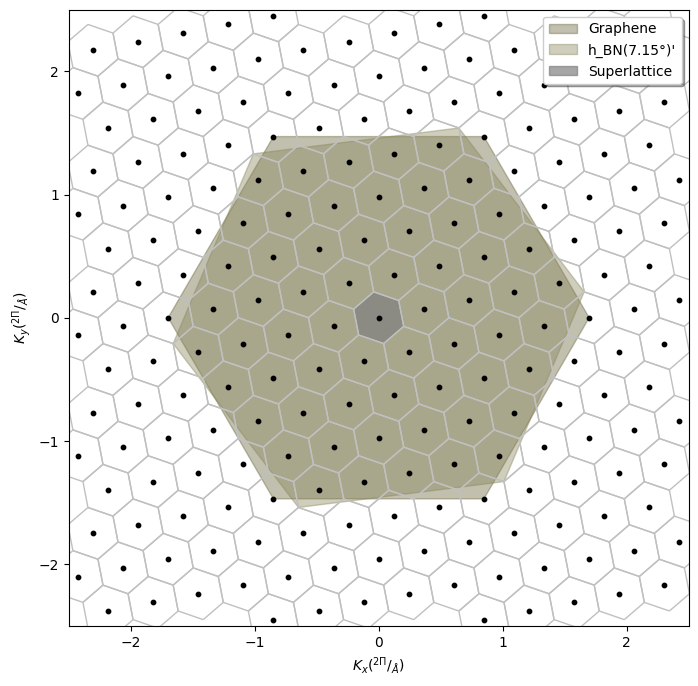

***The calculated supercell is optimized. At least one of the system layers was deformed to do so.


In [7]:
S2 = S2.generateSuperCell(RoS=15, eps=0.01, prntRes=True,showTable=True)

Mapa de difracción.
En esta ocación se ejecutará la función "plot_diffraction_map" con los valores por default y sin haber calculado antes el patrón de difracción.
Así, primero se calculará los valores del Factor de Estructura necesarios, posteriormente, al no haberse indicado un valor para 'width' este se pedirá al usuario.

Evaluating Structure Factor at each network point.


Enter the value of width (γ):  0.01


Calculating diffraction pattern....100.00%

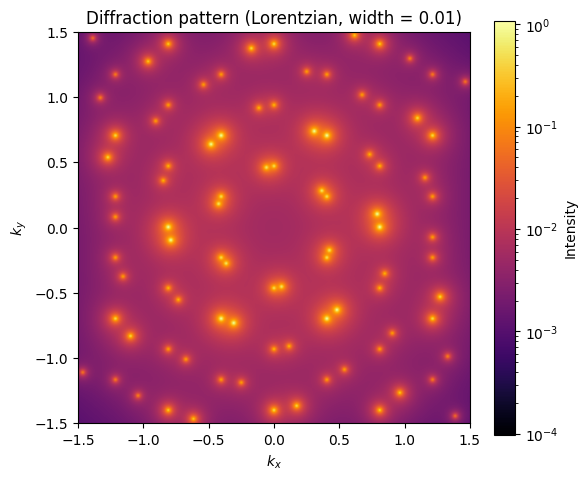

In [8]:
_ = S2.plot_diffraction_map()

## Heteroestructura tricapa WS₂,hBN(6.37°),WSe₂(15.24°)

In [9]:
WS2 = importLattice(VASP_Files+"/WS2")
hBN = importLattice(VASP_Files+"/hBN")
WSe2 = importLattice(VASP_Files+"/WSe2")
S3 = System([WS2,hBN.mRot(6.37),WSe2.mRot(15.24)])

File 'C:\SS\Nook’iin\Nook-iin\VASP_Files/WS2.vasp' will be read
--Lattice created successfully
File 'C:\SS\Nook’iin\Nook-iin\VASP_Files/hBN.vasp' will be read
--Lattice created successfully
File 'C:\SS\Nook’iin\Nook-iin\VASP_Files/WSe2.vasp' will be read
--Lattice created successfully


Size of the primitive vectors: |a|=55.39805Å, |b|=32.85770Å
Angle between vectors: 27.167°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   1    6|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  288   |
|           WS2           |  | -17   -6|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |  21   15|  |  | 0.99248 -0.02038|  |   -1.018% // -0.27°   |  312   |
|       hBN(6.37°)        |  | -23   -9|  |  |-0.00533  0.99026|  |   -1.977% // +1.03°   |        |
|                         |               |                       |                       |        |


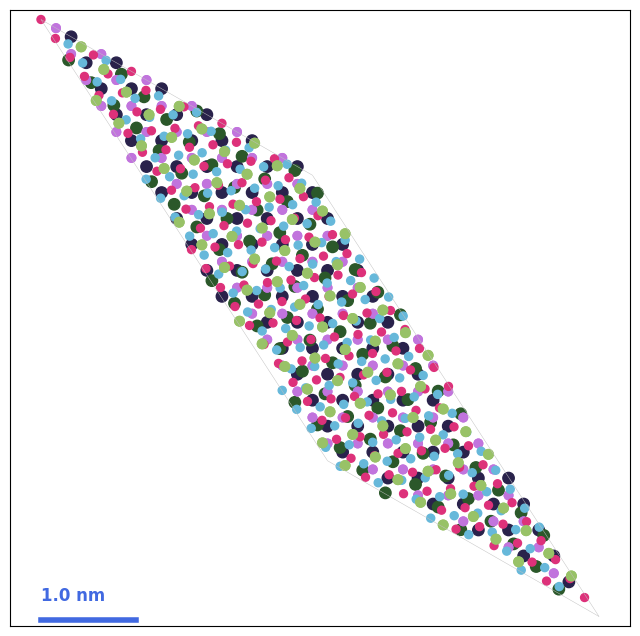

Reciprocal Space:


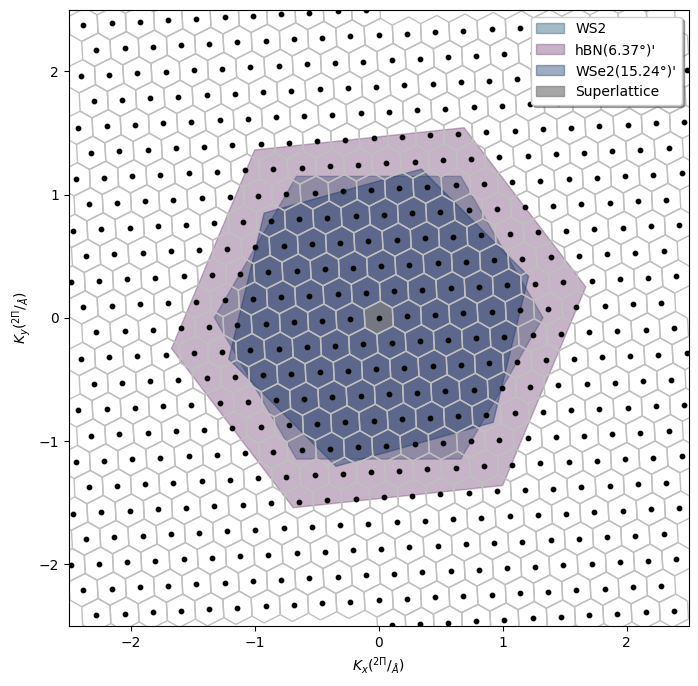

***The calculated supercell is optimized. At least one of the system layers was deformed to do so.


In [10]:
S3=S3.generateSuperCell(RoS=20, eps=0.02, showTable=True)

Mapa de difracción.

En esta ocación se ejecutará la función "plot_diffraction_map" usando tanto la distribución Gausiana cómo la Lorentziana y sin haber calculado antes el patrón de difracción.

AL igual que en el ejemplo anterior, primero se calculará los valores del Factor de Estructura necesarios. El valor para 'width', al contrario de cuando se usa una distribucion "Lorentzian", al usar la distribución "Gaussian" se recomienda usar un valor de width mayor de lo normal.

Evaluating Structure Factor at each network point.
Image address: 'C:\SS\Nook’iin\Nook-iin\Examples\Español\Images/DM-S3(Gaussian).png'


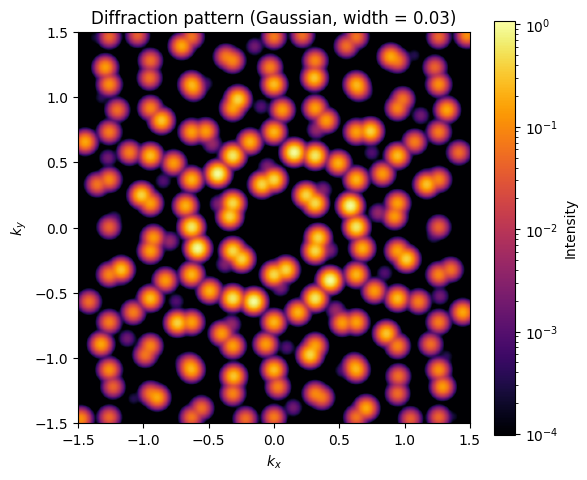

Image address: 'C:\SS\Nook’iin\Nook-iin\Examples\Español\Images/DM-S3(Lorentzian).png'


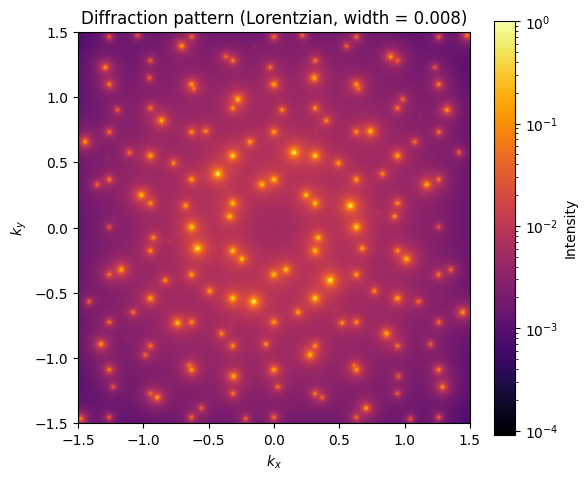

In [11]:
_ = S3.plot_diffraction_map(width=0.03, typ="Gaussian",resolution=300,prnt='DM-S3')
_ = S3.plot_diffraction_map(width=0.008, typ="Lorentzian",resolution=300,prnt='DM-S3')